In [203]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()
sns.set_style('darkgrid')
sns.set_context('notebook')

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

#### Exploratory Data Analysis

In [204]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

print("Train and Test variants shape : ",train_variants_df.shape, test_variants_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

Train and Test variants shape :  (3321, 4) (5668, 3)
Train and Test text shape :  (3321, 2) (5668, 2)


In [205]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [206]:
test_variants_df.head()

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [207]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [208]:
test_text_df.head()

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [209]:
train_text_df['Text'][3]

'Recent evidence has demonstrated that acquired uniparental disomy (aUPD) is a novel mechanism by which pathogenetic mutations in cancer may be reduced to homozygosity. To help identify novel mutations in myeloproliferative neoplasms (MPNs), we performed a genome-wide single nucleotide polymorphism (SNP) screen to identify aUPD in 58 patients with atypical chronic myeloid leukemia (aCML; n = 30), JAK2 mutationâ€“negative myelofibrosis (MF; n = 18), or JAK2 mutationâ€“negative polycythemia vera (PV; n = 10). Stretches of homozygous, copy neutral SNP calls greater than 20Mb were seen in 10 (33%) aCML and 1 (6%) MF, but were absent in PV. In total, 7 different chromosomes were involved with 7q and 11q each affected in 10% of aCML cases. CBL mutations were identified in all 3 cases with 11q aUPD and analysis of 574 additional MPNs revealed a total of 27 CBL variants in 26 patients with aCML, myelofibrosis or chronic myelomonocytic leukemia. Most variants were missense substitutions in the 

In [210]:
train_variants_df.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

##### Looks like class 7 is dominant. Data is unevenly distributed so it is fair to call this unbalanced classification in Training dataset.

Classes 3, 9, and 8 have very low distribution. Plotting the value count for each class:

Text(0.5, 1.0, 'Frequency of Classes')

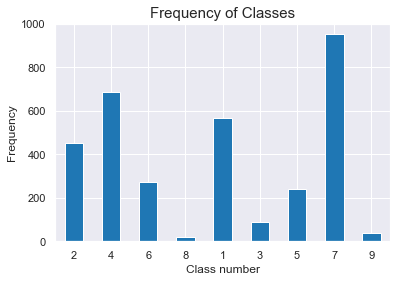

In [211]:
train_variants_df['Class'].value_counts(sort=False).plot(kind="bar", rot=0)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Class number', fontsize=12)
plt.title("Frequency of Classes", fontsize=15)

In [212]:
geneCounts = train_variants_df.Gene.value_counts()
geneCounts.nlargest(20)

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
PIK3CA     56
CDKN2A     52
FGFR2      50
FLT3       49
TSC2       47
MTOR       45
KRAS       44
MAP2K1     43
VHL        41
RET        40
Name: Gene, dtype: int64

Would it be fair to assume that genes are classes are correlated?

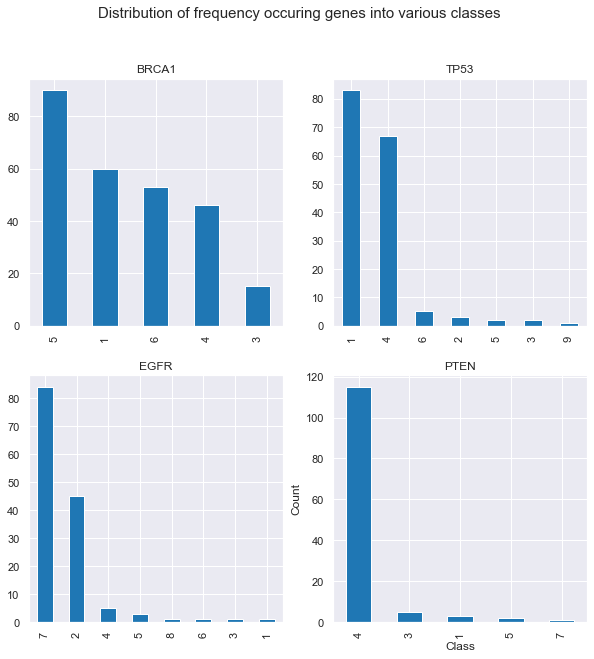

In [213]:
f,axs = plt.subplots(2,2, figsize = (10,10))
f.suptitle("Distribution of frequency occuring genes into various classes", fontsize=15)

train_variants_df.loc[train_variants_df['Gene'] =='BRCA1'].Class.value_counts().plot(kind='bar',ax=axs[0,0])
axs[0,0].set_title('BRCA1')
train_variants_df.loc[train_variants_df['Gene'] =='TP53'].Class.value_counts().plot(kind='bar',ax=axs[0,1])
axs[0,1].set_title('TP53')
train_variants_df.loc[train_variants_df['Gene'] =='EGFR'].Class.value_counts().plot(kind='bar',ax=axs[1,0])
axs[1,0].set_title('EGFR')
train_variants_df.loc[train_variants_df['Gene'] =='PTEN'].Class.value_counts().plot(kind='bar',ax=axs[1,1])
axs[1,1].set_title('PTEN')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

BRCA1: most distribution in class 5
TP53: most distribution in class 4...
Can genes' mutation and classes have any correlation?

In [214]:
variationCounts = train_variants_df.Variation.value_counts()
variationCounts.nlargest(20)

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
Q61H                     3
Q61L                     3
Q61R                     3
E17K                     3
T58I                     3
R173C                    2
M1R                      2
F384L                    2
G13D                     2
G12A                     2
G13C                     2
G12D                     2
S308A                    2
P130S                    2
Name: Variation, dtype: int64

Five types of mutations have most distribution. Low distribution variations are all amino acid swaps at a particular location in the protein.

In [215]:
# replace X123X variation types with "AminoAcid swap" and look at distribution of classes for each variation

mutationTypes = {'Truncating Mutations','Deletion','Amplification','Fusions','Overexpression','AminoAcidSwap'}

# copy the variation column
train_variants_df['Variation_Alt'] = train_variants_df['Variation']

# replace values
train_variants_df['Variation_Alt'] = np.where(train_variants_df['Variation_Alt'].isin(mutationTypes), train_variants_df['Variation_Alt'], 'AminoAcidSwap')


In [216]:
train_variants_df['Variation_Alt']

0       Truncating Mutations
1              AminoAcidSwap
2              AminoAcidSwap
3              AminoAcidSwap
4              AminoAcidSwap
                ...         
3316           AminoAcidSwap
3317           AminoAcidSwap
3318                 Fusions
3319           AminoAcidSwap
3320           AminoAcidSwap
Name: Variation_Alt, Length: 3321, dtype: object

C:\Users\shashi\Documents\Anaconda\lib\site-packages\seaborn\categorical.py:3793: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


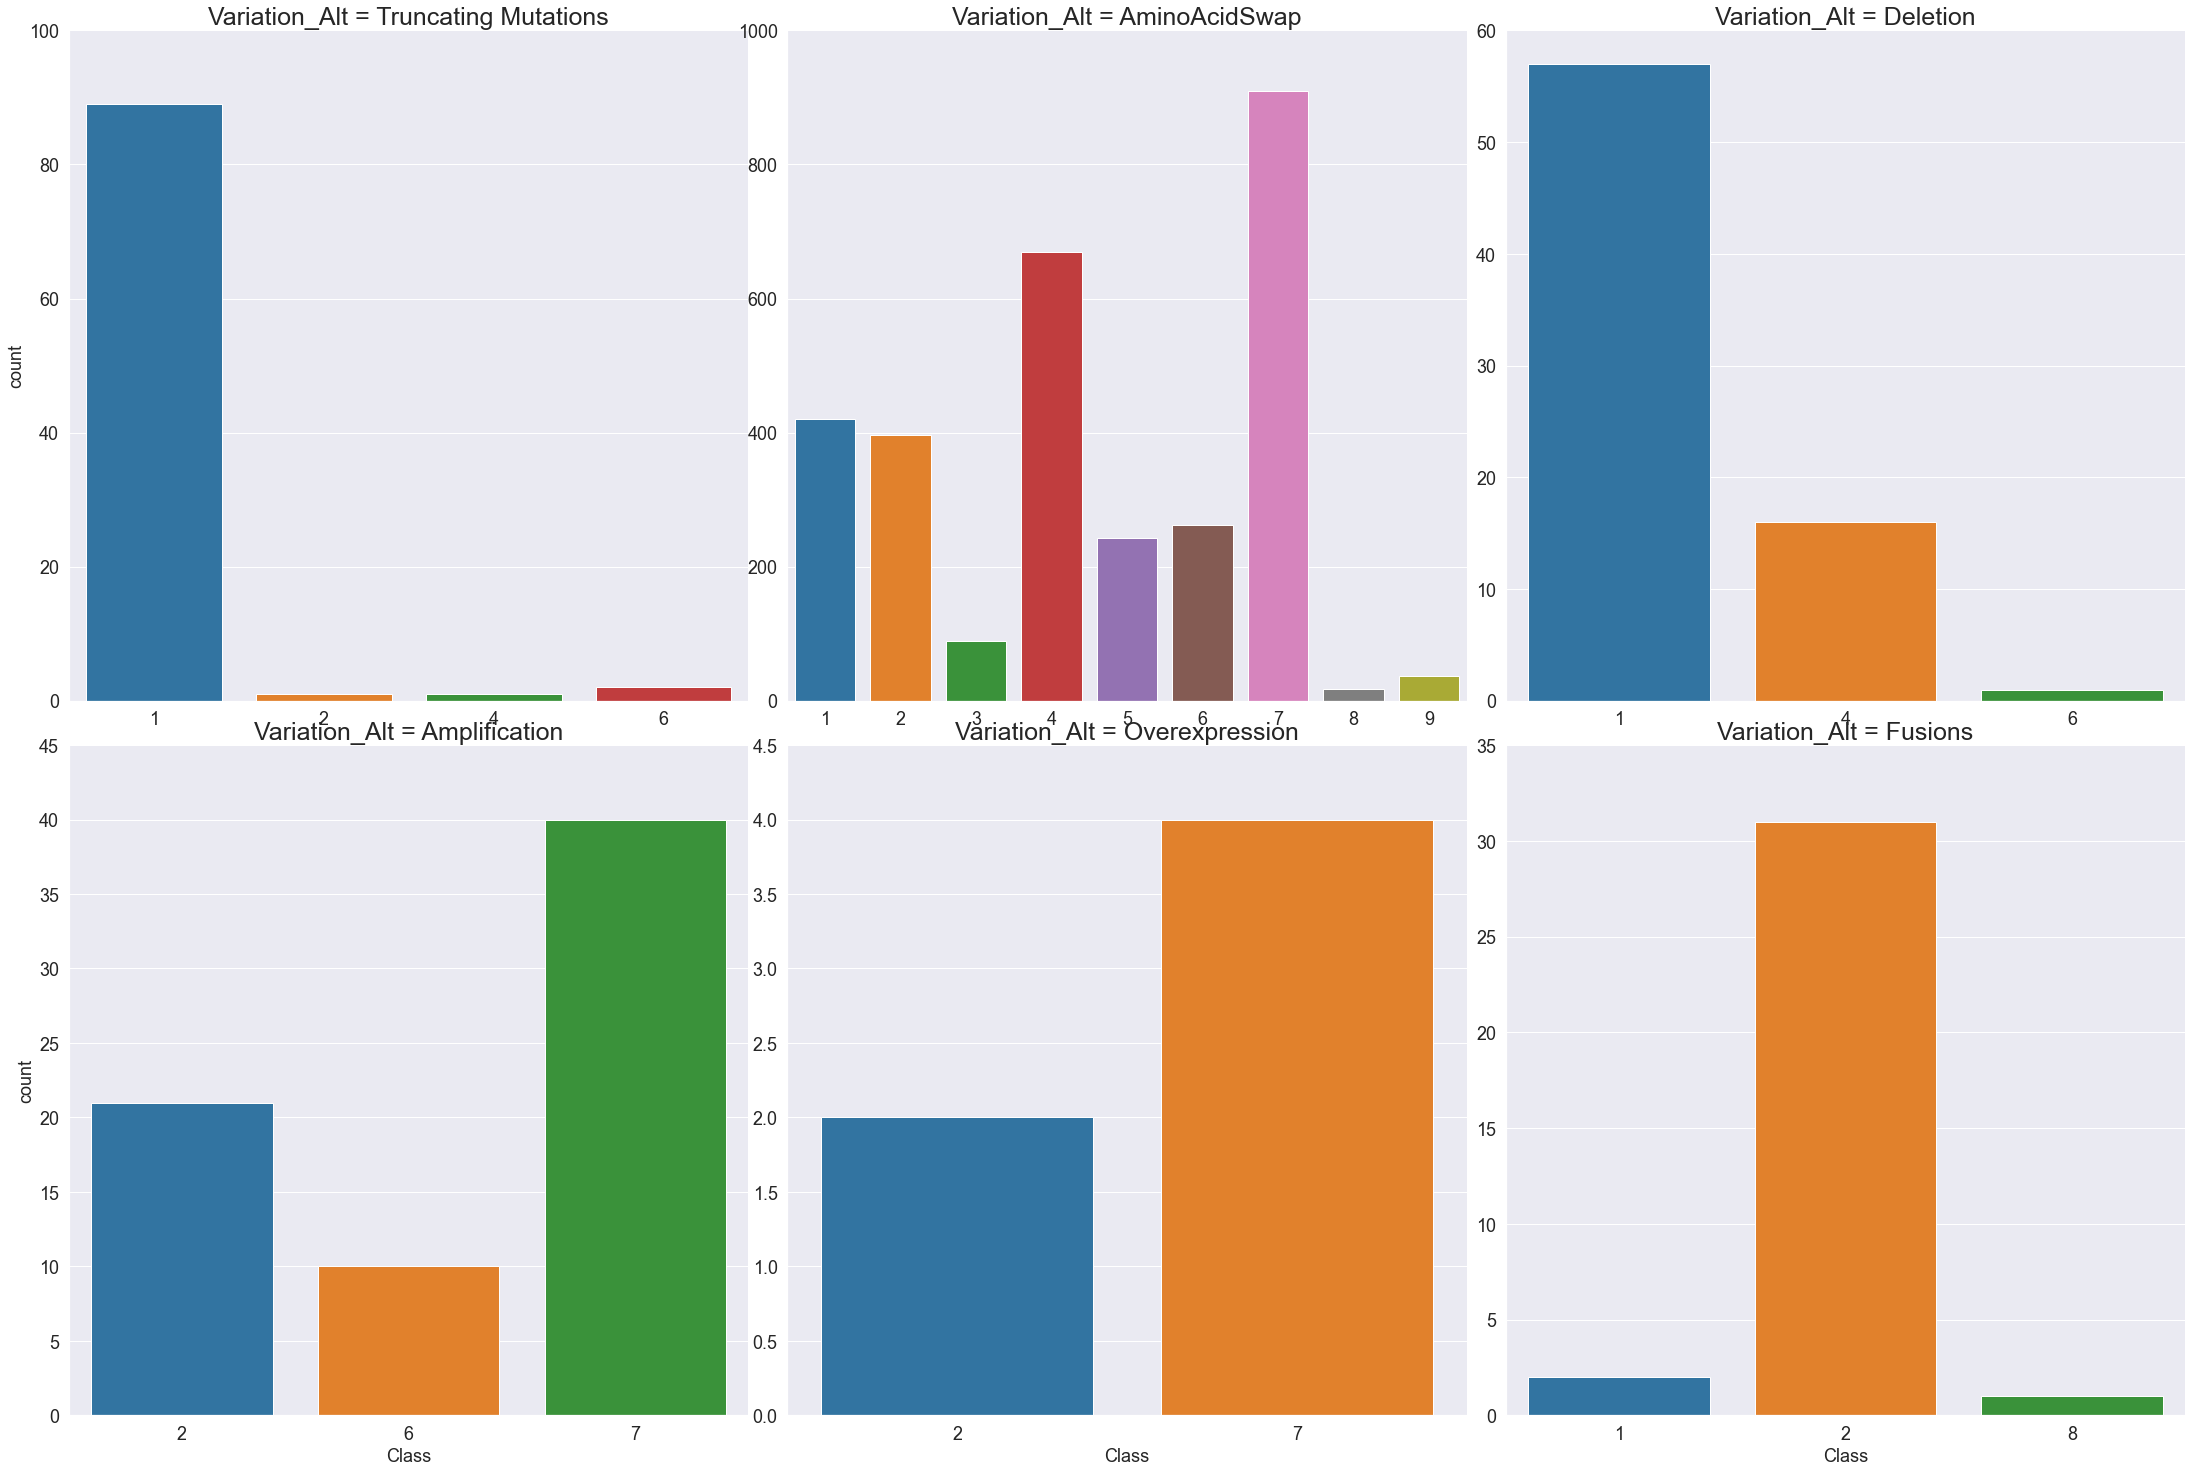

In [217]:
g = sns.catplot(x='Class',data=train_variants_df[['Variation_Alt','Class']],col='Variation_Alt',kind='count',col_wrap=3,
           height = 10,sharey=False,sharex=False)
g.set_yticklabels(size = 18)
g.set_xticklabels(size = 18)
g.set_ylabels(size = 18)
g.set_xlabels(size = 18)
g.set_titles(size = 25)

plt.show()

Some types of variations are heavily associated with certain class. The most prevalent variation AminoAcidSwap is widely distributed among classes. 

The type of variation and the gene itself have some predictive power for the mutation to be classified in a certain class.

##### Let's count number of words per text entry.

In [218]:
# add information about word count and character count
train_text_df["num_words"] = train_text_df["Text"].apply(lambda x: len(str(x).split()) )
train_text_df["num_chars"] = train_text_df["Text"].apply(lambda x: len(str(x)) )

test_text_df["num_words"] = test_text_df["Text"].apply(lambda x: len(str(x).split()) )
test_text_df["num_chars"] = test_text_df["Text"].apply(lambda x: len(str(x)) )

C:\Users\shashi\Documents\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


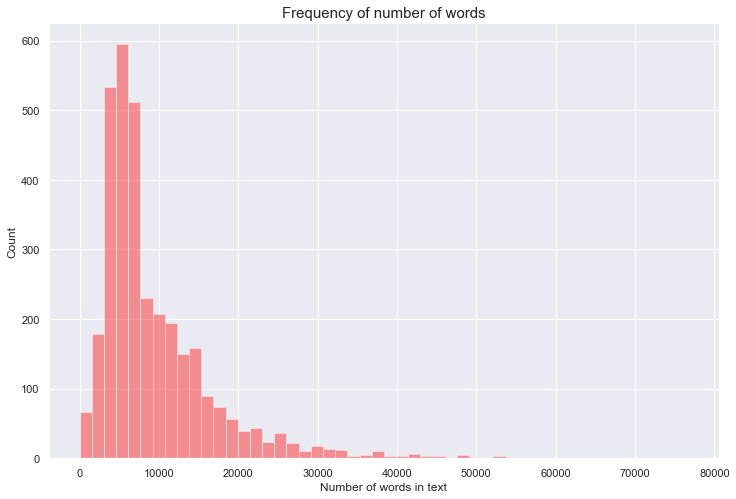

In [219]:
plt.figure(figsize=(12, 8))
sns.distplot(train_text_df.num_words.values, bins=50, kde=False, color='red')
plt.xlabel('Number of words in text', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of number of words", fontsize=15)
plt.show()

Although many text entries are fairly long, it would be difficult to say if they play a role in predicting the class of a particular variation. But the lengthy text entries can have more than one gene variation that will need to be classified separately.

Checking for empty text entries would be helpful here.

In [220]:
train_text_df[train_text_df["num_words"]<5]

,ID,Text,num_words,num_chars
1109,1109,NaN,1,3
1277,1277,NaN,1,3
1407,1407,NaN,1,3
1639,1639,NaN,1,3
2755,2755,NaN,1,3


Before we remove these empty text entries, we need to merge training variant and test variant dataframe with the respective text dataframes.

#### Combining variation data with text data

In [221]:
train_df = pd.merge(train_variants_df, train_text_df, how='left', on='ID')
test_df = pd.merge(test_variants_df, test_text_df, how='left', on='ID')

#### Training Data

In [222]:
train_df.head()

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,1,CBL,W802*,2,AminoAcidSwap,Abstract Background Non-small cell lung canc...,5722,36831
2,2,CBL,Q249E,2,AminoAcidSwap,Abstract Background Non-small cell lung canc...,5722,36831
3,3,CBL,N454D,3,AminoAcidSwap,Recent evidence has demonstrated that acquired...,5572,36308
4,4,CBL,L399V,4,AminoAcidSwap,Oncogenic mutations in the monomeric Casitas B...,6202,41427


In [223]:
train_df[train_df["num_words"]<200]

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
344,344,CDH1,A617T,4,AminoAcidSwap,E-cadherin is involved in the formation of cel...,187,1315
346,346,CDH1,A634V,4,AminoAcidSwap,E-cadherin is involved in the formation of cel...,187,1315
348,348,CDH1,T340A,4,AminoAcidSwap,E-cadherin is involved in the formation of cel...,187,1315
648,648,CDKN2A,Q50*,4,AminoAcidSwap,"The p16 gene is located in chromosome 9p21, a ...",103,706
868,868,HLA-A,596_619splice,1,AminoAcidSwap,A new variant of the HLA-A*010101 allele desig...,184,1219
941,941,PDGFRB,ATF7IP-PDGFRB Fusion,2,AminoAcidSwap,Chronic myelomonocytic leukemia (CMML) is a my...,116,776
1109,1109,FANCA,S1088F,1,AminoAcidSwap,NaN,1,3
1277,1277,ARID5B,Truncating Mutations,1,Truncating Mutations,NaN,1,3
1407,1407,FGFR3,K508M,6,AminoAcidSwap,NaN,1,3
1583,1583,PMS1,Q233*,4,AminoAcidSwap,HEREDITARY nonpolyposis colorectal cancer (HNP...,114,742


In [224]:
train_df.iloc[693].Text

'Cell division is controlled by a series of positive and negative regulators which act at sequential points throughout the cell cycle. Disturbance of these checks could contribute to cancer by allowing excessive cell proliferation. The point in G1 at which cells irrevocably commit to DNA synthesis is controlled by protein complexes consisting of cyclin-dependent kinases (CDK4 or CDK6) and cyclins (D1, D2 or D3). These complexes are inhibited by low molecular weight proteins, such as p16INK4 (refs 1,2), p15INK4B (ref. 3) and p18 (ref. 4). Deletion or mutation of these CDK-inhibitors could lead to unchecked cell growth, suggesting that members of the p16INK4 family may be tumour suppressor genes. The recent detection of p16INK4 (MTS1) mutations in familial melanoma kindreds, many human tumour cell lines, and primary tumours is consistent with this idea. Previously, we described eight germline p16INK4 substitutions in 18 familial melanoma kindreds. Genetic analyses suggested that five mut

Now let's remove the empty rows from combined dataframes.

In [225]:
# remove rows with NaN
train_df = train_df[train_df['Text'].notna()]
test_df = test_df[test_df['Text'].notna()]

train_df[train_df["num_words"]<200]
train_df.shape

(3316, 8)

ID 344, 346, and 348 associated with CDH1 gene comes from the same text and has same class but has three different AminoAcidSwap.
ID 2900, 2906, and 2908 associated with NF2 gene also comes from same text, has three different AminoAcidSwap but one of them belongs to a different class.

#### Test Data

In [226]:
test_df.head()
test_df.shape

(5667, 6)

### Let's prepare solution set and test set first

In [227]:
solution = pd.read_csv('stage1_solution_filtered.csv')
solution2 = pd.read_csv('stage_2_private_solution.csv')

In [228]:
solution.head()

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,12,1,0,0,0,0,0,0,0,0
1,19,0,1,0,0,0,0,0,0,0
2,21,0,1,0,0,0,0,0,0,0
3,55,0,0,0,1,0,0,0,0,0
4,64,0,0,0,1,0,0,0,0,0


In [229]:
solution2.head()

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,8,0,0,0,1,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,1
2,16,0,0,0,0,0,0,0,1,0
3,18,0,1,0,0,0,0,0,0,0
4,19,0,1,0,0,0,0,0,0,0


In [230]:
print('Stage-1 solution has', len(solution), 'entries')
print('Stage-2 solution has', len(solution2), 'entries')
print('The testing set has', len(test_df), 'entries')

Stage-1 solution has 368 entries
Stage-2 solution has 125 entries
The testing set has 5667 entries


Since the testing set has more than 5000 entries and in order to align stage1 + stage 2 solution to the testing set, we first need to merge the test set and solution set.

Let's first combine solution sets

In [231]:
#combine solution sets
stacked_solution = solution.append(solution2)
stacked_solution.shape

(493, 10)

In [232]:
merge_test_solution = pd.merge(test_df,stacked_solution,on='ID')
merge_test_solution.head()

,ID,Gene,Variation,Text,num_words,num_chars,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,8,CLCF1,R197L,NPM1 gene at chromosome 5q35 is involved in re...,3737,25881,0,0,0,1,0,0,0,0,0
1,12,TET2,Y1902A,TET proteins oxidize 5-methylcytosine (5mC) on...,7123,46418,1,0,0,0,0,0,0,0,0
2,15,EFNB1,M158V,Mutations leading to activation of the RAF-mit...,10126,67612,0,0,0,0,0,0,0,0,1
3,16,PKHD1,V3471G,Janus (Jak) tyrosine kinases contain a tyrosin...,10372,69262,0,0,0,0,0,0,0,1,0
4,18,PGK1,T352N,The actions of RhoA in cytoskeletal regulation...,5868,39859,0,1,0,0,0,0,0,0,0


In [233]:
solution_df_truncated = merge_test_solution.iloc[:,6:6+9]
solution_df_truncated.index = merge_test_solution.ID
print('size of combined & truncated solution is', solution_df_truncated.shape)
solution_df_truncated.head()

size of combined & truncated solution is (492, 9)


,class1,class2,class3,class4,class5,class6,class7,class8,class9
ID,,,,,,,,,
8,0,0,0,1,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,1
16,0,0,0,0,0,0,0,1,0
18,0,1,0,0,0,0,0,0,0


In [234]:
test_df_truncated = merge_test_solution.iloc[:,0:6]
print('size of truncated test set is', test_df_truncated.shape)
test_df_truncated.head()

size of truncated test set is (492, 6)


,ID,Gene,Variation,Text,num_words,num_chars
0,8,CLCF1,R197L,NPM1 gene at chromosome 5q35 is involved in re...,3737,25881
1,12,TET2,Y1902A,TET proteins oxidize 5-methylcytosine (5mC) on...,7123,46418
2,15,EFNB1,M158V,Mutations leading to activation of the RAF-mit...,10126,67612
3,16,PKHD1,V3471G,Janus (Jak) tyrosine kinases contain a tyrosin...,10372,69262
4,18,PGK1,T352N,The actions of RhoA in cytoskeletal regulation...,5868,39859


test_df_truncated and solution_df_truncated are variables to be used

An alternate way

In [235]:
IDs_to_drop = set(test_df.ID) - set(solution.ID)
test_df_stage1 = test_df.drop(labels=list(IDs_to_drop))
print('The solution has', len(solution), 'entries')
print('The testing set has', len(test_df), 'entries')
print('The truncated testing set has', len(test_df_stage1), 'entries')

The solution has 368 entries
The testing set has 5667 entries
The truncated testing set has 367 entries


## Let's clean the text data

In [236]:
import nltk
nltk.download('stopwords')
import string
import re #regular expressions
from nltk.corpus import stopwords
# note: to use stopwords, first do nltk.download() to download the various corpi in nltk.

# TO DO:
# we should remove the references from the text field!! e.g., if there are references like (1,2) or [5][6]
# use regex expression to clean these up!

def textClean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=)(]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]    
    text = " ".join(text)
    return(text)

def cleanup(text):
    text = textClean(text)
    text= text.translate(str.maketrans("","", string.punctuation))
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shashi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [237]:
allText_train = train_df['Text'].apply(cleanup)
allText_test = test_df_truncated['Text'].apply(cleanup)

In [238]:
# before
train_df['Text'][20][1500:2500]

'ach year approximately 219,400 people are diagnosed with lung cancers, out of which more than 145,000 of them succumb to the disease [1]. This number is roughly equivalent to the combined mortality rates of cancers of the breast, prostate, colon, liver, kidney and melanoma [1]. In addition the prognosis is usually poor and the five-year survival rate is less than 15%. There are also significant ethnic differences for lung cancer, and the outcome is worse for blacks compared to whites. Gender differences are also striking with women having significantly better prognosis as compared to men. There are a number of genetic alterations that can occur in lung cancer. As an example, in NSCLC, mutations in KRAS, p53, EGFR and MET have been identified. Many of these pathways, especially Receptor Tyrosine Kinases (RTKs) are controlled by c-CBL.  CBL (Casitas B-lineage lymphoma) is a mammalian gene located on human chromosome 11q23.3 [2] and is involved in cell signaling and protein ubiquitinatio

In [239]:
# after
allText_train[20][1500:2500]

'ces also striking women significantly better prognosis compared men number genetic alterations occur lung cancer example nsclc mutations kras p53 egfr met identified many pathways especially receptor tyrosine kinases rtks controlled ccbl cbl casitas blineage lymphoma mammalian gene located human chromosome 11q233 2 involved cell signaling protein ubiquitination 3  cbl proteins belong ring finger class ubiquitin ligases e3 three homologues ccbl cblb cbl3 4  ccbl cblb genes ubiquitously expressed highest levels hematopoietic tissues 5  ccbl consists four regions encoding functionally distinct protein domains nterminal tyrosine kinase binding tkb domain linker region catalytic ring finger domain prolinerich region cterminal ubiquitinassociated uba domain also overlaps leucinezipper lz domain 3  tkb ring finger domains essential ligandinduced ubiquitination rtks 6  7  8  9  ring finger domain required recruitment e2 ubiquitinconjugating enzymes tkb domain includes fourhelix bundle 4h calc

### Let's train and test our models

In [240]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
import scikitplot.plotters as skplt

In [241]:
# put everything together into a function
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true,y_pred,title='ROC title'):
    # calculate ROC in a one-vs-all manner
    # y_true needs to be binary (one-hot encoded)
    # y_pred needs to be probabilities
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    num_classes = y_true.shape[1]

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i],y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label='Class %i (area = %0.2f)' %(i+1,roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

    return roc_auc

In [242]:
def evaluate_features(X, y, X_test, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    clf.fit(X,y)
    y_pred = clf.predict_proba(X_test)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)
    print('y_true shape is', y_true.shape)
    print('y_pred shape is', y_pred.shape)
    plot_roc(y_true, y_pred)

In [243]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

In [244]:
bag_of_words = count_vectorizer.fit_transform(allText_train)

In [245]:
len(count_vectorizer.get_feature_names())

234438

In [246]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_train = svd.fit_transform(bag_of_words)

In [247]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

bag_of_words = count_vectorizer.fit_transform(allText_test)

len(count_vectorizer.get_feature_names())

99613

In [248]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test = svd.fit_transform(bag_of_words)


In [250]:
y_true = solution_df_truncated.values
X_train_all = truncated_train
y_train_all = train_df['Class'].values.ravel()
X_test = truncated_test

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.6s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

Log loss: 2.678424046372074
Accuracy: 0.37454764776839566
y_true shape is (492, 9)
y_pred shape is (492, 9)


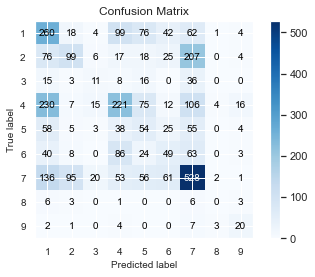

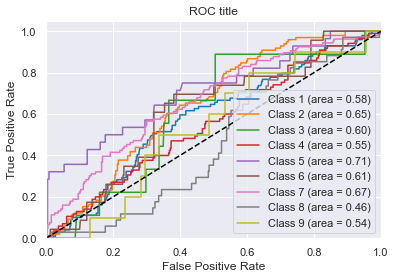

In [251]:
evaluate_features(truncated_train, train_df['Class'].values.ravel(), X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.0s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.5749834867374888
Accuracy: 0.42279855247285886
y_true shape is (492, 9)
y_pred shape is (492, 9)


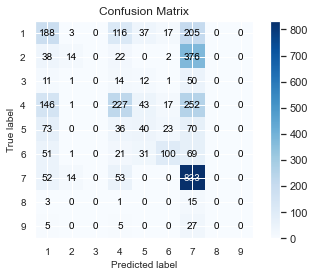

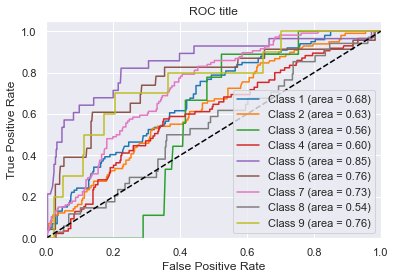

In [252]:
evaluate_features(truncated_train, train_df['Class'].values.ravel(), X_test,
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [253]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(allText_train)

len(count_vectorizer.get_feature_names())

234438

In [254]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_train = svd.fit_transform(tfidf)

In [255]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

tfidf = count_vectorizer.fit_transform(allText_test)

len(count_vectorizer.get_feature_names())

99613

In [256]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test = svd.fit_transform(tfidf)

In [257]:
y_true = solution_df_truncated.values
X_train_all = truncated_train
y_train_all = train_df['Class'].values.ravel()
X_test = truncated_test

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Log loss: 1.696558167710688
Accuracy: 0.37876960193003617
y_true shape is (492, 9)
y_pred shape is (492, 9)


C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


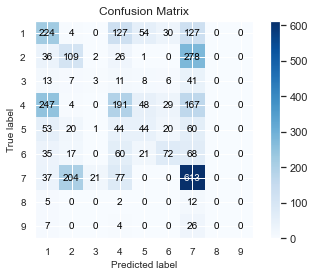

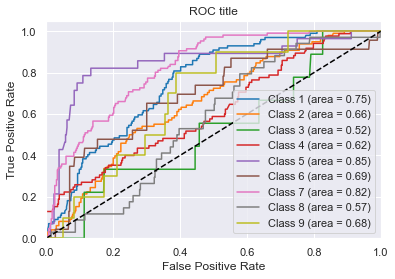

In [258]:
evaluate_features(truncated_train, train_df['Class'].values.ravel(), X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.3s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.5634513784458206
Accuracy: 0.4333534378769602
y_true shape is (492, 9)
y_pred shape is (492, 9)


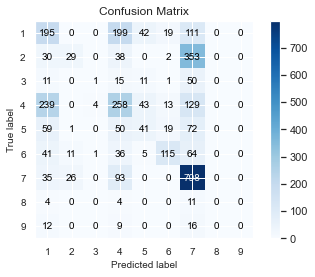

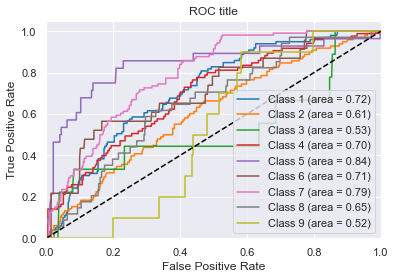

In [259]:
evaluate_features(truncated_train, train_df['Class'].values.ravel(), X_test, 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

## Data Abbreviation
#### Let's abbreviate the data through undersampling. Will that improve our confusion matrix? ROC Curve?

In [260]:
train_df

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,1,CBL,W802*,2,AminoAcidSwap,Abstract Background Non-small cell lung canc...,5722,36831
2,2,CBL,Q249E,2,AminoAcidSwap,Abstract Background Non-small cell lung canc...,5722,36831
3,3,CBL,N454D,3,AminoAcidSwap,Recent evidence has demonstrated that acquired...,5572,36308
4,4,CBL,L399V,4,AminoAcidSwap,Oncogenic mutations in the monomeric Casitas B...,6202,41427
...,...,...,...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,AminoAcidSwap,Introduction Myelodysplastic syndromes (MDS) ...,11021,74278
3317,3317,RUNX1,A122*,1,AminoAcidSwap,Introduction Myelodysplastic syndromes (MDS) ...,6068,40363
3318,3318,RUNX1,Fusions,1,Fusions,The Runt-related transcription factor 1 gene (...,5122,36384
3319,3319,RUNX1,R80C,4,AminoAcidSwap,The RUNX1/AML1 gene is the most frequent targe...,4885,32568


We have unbalanced classes.
Let's slice the classes with higher distribution.
Let's trim the classes 1, 2, 4, and, 7 to the size of classes 5 and 6 to have even distribution of data.

In [261]:
train_df1 = train_df[train_df["Class"]== 1]
train_df1 = train_df1.head(250)


In [262]:
train_df2 = train_df[train_df["Class"]== 2]
train_df2 = train_df2.head(250)

In [263]:
train_df4 = train_df[train_df["Class"]== 4]
train_df4 = train_df4.head(250)


In [264]:
train_df5 = train_df[train_df["Class"]== 5]

In [265]:
train_df6 = train_df[train_df["Class"]== 6]

In [266]:
train_df7 = train_df[train_df["Class"]== 7]
train_df7 = train_df7.head(250)


###### Let's concatenate all the sliced classes to form a new training dataframe.

In [267]:
new_train_df = pd. concat([train_df1, train_df2, train_df4, train_df5, train_df6, train_df7], axis=0, ignore_index=True)

In [268]:
new_train_df

,ID,Gene,Variation,Class,Variation_Alt,Text,num_words,num_chars
0,0,FAM58A,Truncating Mutations,1,Truncating Mutations,Cyclin-dependent kinases (CDKs) regulate a var...,6089,39765
1,7,CBL,Deletion,1,Deletion,CBL is a negative regulator of activated recep...,14684,99183
2,16,CBL,Truncating Mutations,1,Truncating Mutations,To determine if residual cylindrical refractiv...,8118,54603
3,37,DICER1,D1709E,1,AminoAcidSwap,Sex cordâ€“stromal tumors and germ-cell tumors...,2710,18609
4,38,DICER1,D1709A,1,AminoAcidSwap,Sex cordâ€“stromal tumors and germ-cell tumors...,2710,18609
...,...,...,...,...,...,...,...,...
1510,1077,FOXA1,Amplification,7,Amplification,Forkhead box protein A1 (FOXA1) modulates the ...,48698,330709
1511,1079,MDM2,Amplification,7,Amplification,ABSTRACT The p53 tumor suppressor gene is inac...,16305,107617
1512,1087,EZH2,Overexpression,7,Overexpression,EZH2 is a member of the polycomb group of gene...,13710,92540
1513,1088,EZH2,Amplification,7,Amplification,EZH2 is a member of the polycomb group of gene...,13710,92540


In [269]:
newText_train = new_train_df['Text'].apply(cleanup)

In [270]:
new_train_df['Text'][4][1500:2000]

'10,11 The resultant RNA duplex is loaded into the RNA-induced silencing complex (RISC) containing an Argonaute protein. The miRNA* strand is then removed, leaving the miRNA strand, which targets messenger RNAs for degradation or interacts with the translation initiation complex to inhibit and destabilize translation of the targeted messenger RNAs.12,13 The expression levels of Dicer have global effects on the biogenesis of miRNA, and reduced expression correlates with a poor outcome in many canc'

In [271]:
newText_train[4][1500:2000]

'ffects biogenesis mirna reduced expression correlates poor outcome many cancers71418 mouse models cancer loss single dicer1 allele haploinsufficiency reduced time tumor onset19 survival time20 compared control animals experimental data support hypothesis pathogenicity aberrations dicer function dependent cellular context activation inhibition pathways tissuespecific development differentiation least partially controlled specific mirnas mirna families7821 mouse models urogenitalspecific knockout '

In [272]:
merge_test_solution1 = merge_test_solution[merge_test_solution['class1']==1]
merge_test_solution2 = merge_test_solution[merge_test_solution['class2']==1]
merge_test_solution4 = merge_test_solution[merge_test_solution['class4']==1]
#merge_test_solution389 =pd. concat([merge_test_solution3, merge_test_solution8, merge_test_solution9])
#merge_test_solution389
#merge_test_solution389.shape
#IDs_to_keep = set(merge_test_solution.ID) - set(merge_test_solution3.ID)
merge_test_solution5 = merge_test_solution[merge_test_solution['class5']==1]
merge_test_solution6 = merge_test_solution[merge_test_solution['class6']==1]
merge_test_solution7 = merge_test_solution[merge_test_solution['class7']==1]
merge_test_solution_ab =pd. concat([merge_test_solution1, merge_test_solution2, merge_test_solution4, merge_test_solution5, merge_test_solution6, merge_test_solution7])
merge_test_solution_ab
merge_test_solution_ab = merge_test_solution_ab.drop(['class3', 'class8', 'class9'],axis=1)
merge_test_solution_ab

,ID,Gene,Variation,Text,num_words,num_chars,class1,class2,class4,class5,class6,class7
1,12,TET2,Y1902A,TET proteins oxidize 5-methylcytosine (5mC) on...,7123,46418,1,0,0,0,0,0
28,121,BRCA1,T1773I,Genetic screening of the breast and ovarian ca...,5245,35492,1,0,0,0,0,0
30,129,GNPTG,G106S,Neurofibromatosis type 1 (NF1) is one of the m...,9074,59009,1,0,0,0,0,0
32,137,TP53,Q144P,Inheritance of germ-line mutant alleles of BRC...,4635,31412,1,0,0,0,0,0
34,159,BRCA2,Truncating Mutations,Abstract Heterozygous germ line mutations in ...,25246,165461,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
478,5451,AKT2,BCAM-AKT2 Fusion,High-grade serous ovarian cancer (HGSC) is the...,3651,23979,0,0,0,0,0,1
479,5464,KIT,V560del,To analyze a multi-institutional series of typ...,17261,111512,0,0,0,0,0,1
481,5500,CTNNB1,G34A,We screened 75 primary hepatocellular carcinom...,9109,61826,0,0,0,0,0,1
482,5509,CTNNB1,D32G,We screened 75 primary hepatocellular carcinom...,8858,60091,0,0,0,0,0,1


In [273]:
solution_df_truncated_ab = merge_test_solution_ab.iloc[:,6:6+6]
solution_df_truncated_ab.index = merge_test_solution_ab.ID
print('size of truncated & abreviated solution is', solution_df_truncated_ab.shape)
solution_df_truncated_ab

size of truncated & abreviated solution is (439, 6)


,class1,class2,class4,class5,class6,class7
ID,,,,,,
12,1,0,0,0,0,0
121,1,0,0,0,0,0
129,1,0,0,0,0,0
137,1,0,0,0,0,0
159,1,0,0,0,0,0
...,...,...,...,...,...,...
5451,0,0,0,0,0,1
5464,0,0,0,0,0,1
5500,0,0,0,0,0,1


In [274]:
test_df_truncated_ab = merge_test_solution_ab.iloc[:,0:6]
print('size of truncated test set is', test_df_truncated_ab.shape)
test_df_truncated.head()

size of truncated test set is (439, 6)


,ID,Gene,Variation,Text,num_words,num_chars
0,8,CLCF1,R197L,NPM1 gene at chromosome 5q35 is involved in re...,3737,25881
1,12,TET2,Y1902A,TET proteins oxidize 5-methylcytosine (5mC) on...,7123,46418
2,15,EFNB1,M158V,Mutations leading to activation of the RAF-mit...,10126,67612
3,16,PKHD1,V3471G,Janus (Jak) tyrosine kinases contain a tyrosin...,10372,69262
4,18,PGK1,T352N,The actions of RhoA in cytoskeletal regulation...,5868,39859


In [275]:
allText_test_ab = test_df_truncated_ab['Text'].apply(cleanup)

In [276]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

In [277]:
bag_of_words = count_vectorizer.fit_transform(newText_train)

In [278]:
len(count_vectorizer.get_feature_names())

130353

In [279]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_train_ab = svd.fit_transform(bag_of_words)

In [280]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

bag_of_words = count_vectorizer.fit_transform(allText_test_ab)

len(count_vectorizer.get_feature_names())

91097

In [281]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test_ab = svd.fit_transform(bag_of_words)

In [282]:
X_train_ab = truncated_train_ab
y_true = solution_df_truncated_ab.values
y_train_ab = new_train_df['Class'].values.ravel()
X_test = truncated_test_ab

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

Log loss: 2.0935831371840234
Accuracy: 0.44620462046204623
y_true shape is (439, 6)
y_pred shape is (439, 6)


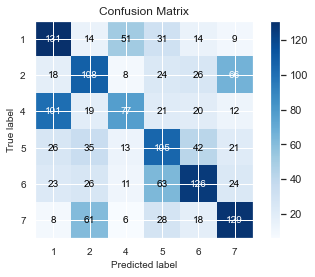

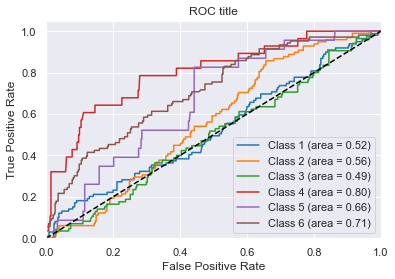

In [283]:
evaluate_features(truncated_train_ab, new_train_df['Class'].values.ravel(),X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.4515784311935613
Accuracy: 0.4495049504950495
y_true shape is (439, 6)
y_pred shape is (439, 6)


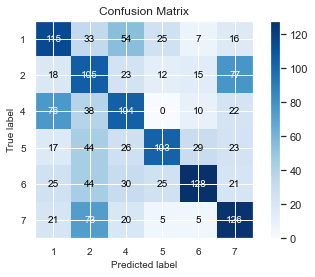

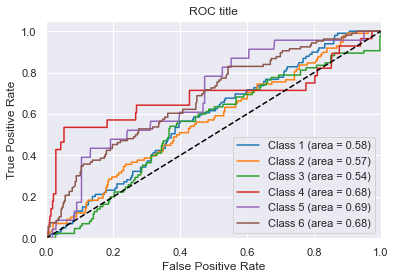

In [285]:
evaluate_features(truncated_train_ab, new_train_df['Class'].values.ravel(), X_test,
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [286]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(newText_train)

len(count_vectorizer.get_feature_names())

130353

In [287]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_train_ab = svd.fit_transform(tfidf)

In [288]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

tfidf = count_vectorizer.fit_transform(allText_test_ab)

len(count_vectorizer.get_feature_names())

91097

In [289]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test_ab = svd.fit_transform(tfidf)

In [290]:
X_train_ab = truncated_train_ab
y_true = solution_df_truncated_ab.values
y_train_ab = new_train_df['Class'].values.ravel()
X_test = truncated_test_ab

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.4112436387590095
Accuracy: 0.44224422442244227
y_true shape is (439, 6)
y_pred shape is (439, 6)


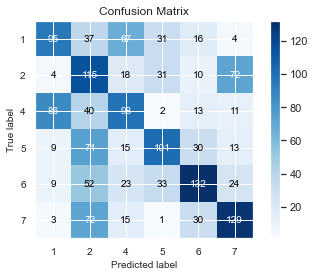

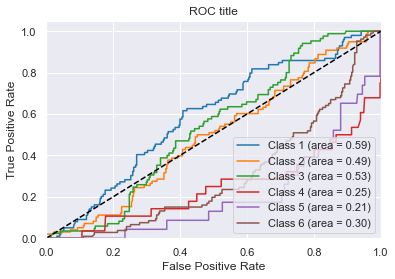

In [291]:
evaluate_features(truncated_train_ab, new_train_df['Class'].values.ravel(),X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.4655340698596575
Accuracy: 0.44620462046204623
y_true shape is (439, 6)
y_pred shape is (439, 6)


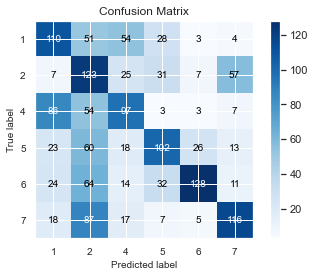

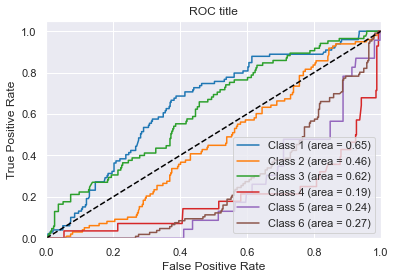

In [292]:
evaluate_features(truncated_train_ab, new_train_df['Class'].values.ravel(),X_test, 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

### What happens if we train on filtered solution test data?
###### Run our test data on our trained model

In [293]:
# one hot -> series
sol_size = len(solution_df_truncated)
desired_class = np.zeros((sol_size,1))
desired_ID = np.zeros((sol_size,1))

for i in range(sol_size):
    desired_class[i] = np.where(solution_df_truncated.iloc[i] == 1)[0][0]+1
    desired_ID[i] =  solution_df_truncated.index[i]

In [294]:
desired_class.shape

(492, 1)

In [297]:
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

bag_of_words = count_vectorizer.fit_transform(allText_test)

len(count_vectorizer.get_feature_names())

99613

In [298]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test = svd.fit_transform(bag_of_words)


In [300]:
y_true = solution_df_truncated.values
X_train = truncated_test
y_train = desired_class.ravel()
X_test = truncated_test

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

Log loss: 2.3773610182311646
Accuracy: 0.3434959349593496
y_true shape is (492, 9)
y_pred shape is (492, 9)


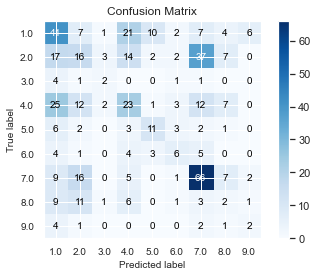

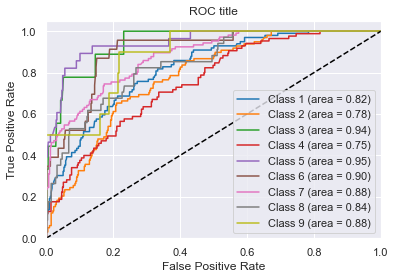

In [301]:
evaluate_features(truncated_test, desired_class.ravel(),X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.6357143566620471
Accuracy: 0.4146341463414634
y_true shape is (492, 9)
y_pred shape is (492, 9)


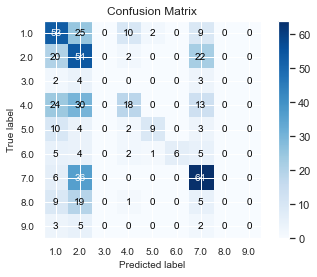

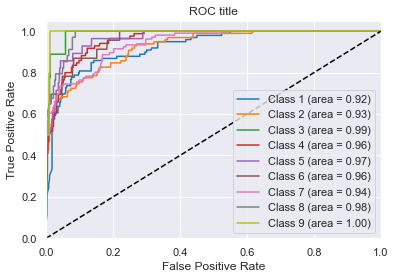

In [302]:
evaluate_features(truncated_test, desired_class.ravel(),X_test, 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))

In [303]:
count_vectorizer = TfidfVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)    

tfidf = count_vectorizer.fit_transform(allText_test)

len(count_vectorizer.get_feature_names())

99613

In [304]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_test = svd.fit_transform(tfidf)

In [305]:
y_true = solution_df_truncated.values
X_train = truncated_test
y_train = desired_class.ravel()
X_test = truncated_test

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


Log loss: 1.656407129503232
Accuracy: 0.3943089430894309
y_true shape is (492, 9)
y_pred shape is (492, 9)


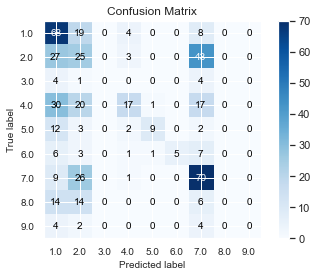

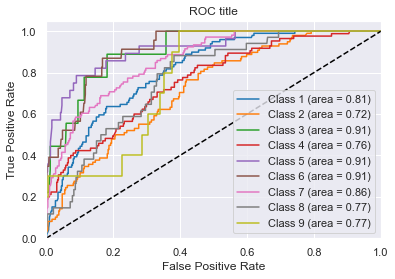

In [306]:
evaluate_features(truncated_test, desired_class.ravel(), X_test)

C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\Users\shashi\Documents\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: Future

Log loss: 1.6200616082738122
Accuracy: 0.41260162601626016
y_true shape is (492, 9)
y_pred shape is (492, 9)


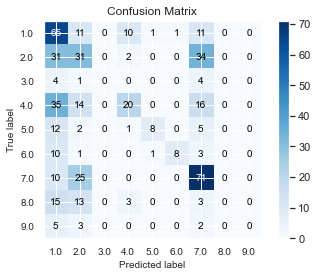

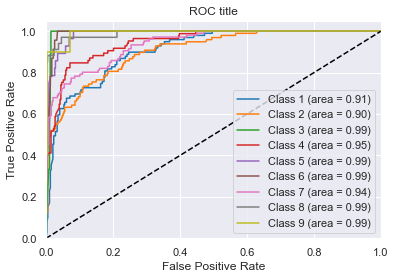

In [307]:
evaluate_features(truncated_test, desired_class.ravel(), X_test, 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))